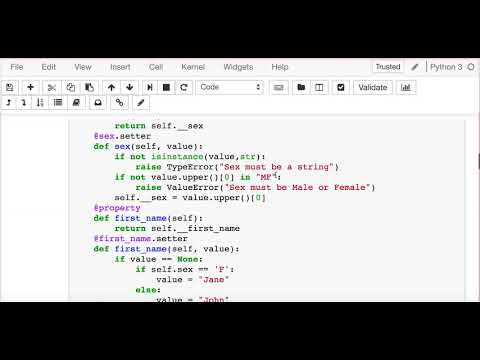

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("gUZ8zIiOVio")

In [ ]:
import datetime
import dateutil
import time

# Modeling Persons and Patients

In [ ]:
class Person(object): 
    def __init__(self,first_name=None,last_name=None,
                 middle_name='',sex='F',dob=None, **kwargs):
        self.sex = sex
        self.first_name = first_name
        self.middle_name = middle_name
        self.last_name = last_name
        if dob == None:
            self.__dob = None
        elif isinstance(dob,str):
            try:
                self.__dob = dateutil.parser.parse(dob)
            except Exception as error:
                print(error)
                self.__dob = None
        elif isinstance(dob.datetime.date):
            self.__dob = dob
        else:
            raise TypeError("Invalid date of birth specification")
        
        
    @property
    def dob(self):
        return self.__dob
    @property
    def age(self):
        td = datetime.datetime.now()-self.__dob
        return {"years":td.days//365, "months":td.days%365//30}
        
    @property
    def sex(self):
        return self.__sex
    @sex.setter
    def sex(self, value):
        if not isinstance(value,str):
            raise TypeError("Sex must be a string")
        if not value.upper()[0] in "MF":
            raise ValueError("Sex must be Male or Female")
        self.__sex = value.upper()[0]
    @property 
    def first_name(self):
        return self.__first_name
    @first_name.setter
    def first_name(self, value):
        if value == None:
            if self.sex == 'F':
                value = "Jane"
            else:
                value = "John"
        if not isinstance(value,str):
            raise TypeError("first name must be a string")
        self.__first_name = value
    @property 
    def last_name(self):
        return self.__last_name
    @last_name.setter
    def last_name(self, value):
        if value == None:
            value = "Doe"
        if not isinstance(value,str):
            raise TypeError("last name must be a string")
        self.__last_name = value
        
    @property 
    def middle_name(self):
        return self.__middle_name
    @middle_name.setter
    def middle_name(self, value):

        if not isinstance(value,str):
            raise TypeError("last name must be a string")
        self.__middle_name = value
    def get_full_name(self):
        name = "%s %s %s"%(self.first_name,
                           self.middle_name,
                           self.last_name)
        return name
        
    def get_characteristics(self):
        """Get the individual characteristics in a string"""
        txt = """First Name=%s\n"""%self.first_name
        txt += """Middle Name=%s\n"""%self.middle_name
        txt +="""Last Name=%s\n"""%self.last_name
        txt += """Sex=%s\n"""%self.sex
        txt += "Age=%d years, %d months\n"%(self.age["years"],
                                            self.age["months"])
        return txt
        

In [ ]:
me = Person(first_name="Brian", middle_name="E.", 
            last_name="Chapman", sex="Male", dob="May 24, 68")
print(me.get_full_name())
print(me.get_characteristics())

# Defining an Inherited Class: Patient

In [ ]:
class Patient(Person):
    def __init__(self,PCP=None,
                 chief_complaint=None, MRN=0, **kwargs):
        super(Patient,self).__init__(**kwargs)
        self.PCP = PCP
        self.chief_complaint = chief_complaint
        self.MRN = MRN
        
        @property
        def PCP(self):
            return self.__PCP
        @PCP.setter
        def PCP(self,value):
            if not isinstance(value, str):
                raise TypeError("PCP must be a string")
            self.__PCP = value
        @property
        def chief_complaint(self):
            return self.__chief_complaint
        @chief_complaint.setter
        def chief_complaint(self, value):
            self.__chief_complaint = value
        @property
        def MRN(self):
            return self.__MRN
        @MRN.setter
        def MRN(self, value):
            if not isinstance(value,str):
                raise TypeError("MRN must be a string")
            if len(value) != 12:
                return ValueError("MRN must be 12 characters long")
            self.__MRN = value
        
        
    def get_characteristics(self):
        """Get the patient characteristics in a string"""
        txt = super(Patient,self).get_characteristics()
        txt += "PCP=%s\n"%self.PCP
        txt += "Chief Complaint=%s\n"%self.chief_complaint
        txt += "MRN=%s\n"%self.MRN
        return txt

In [ ]:
brian = Person(first_name='Brian',
                          last_name='Chapman',
                          middle_name='Earl',
                          sex='M',
               dob="5/24/1968")
print(brian.age)
print (brian.get_characteristics())

In [ ]:
patient_brian = Patient(first_name='Brian',
                        last_name='Chapman',
                        middle_name='Earl',
                        sex='M',
                        dob="5/24/1968",
                        PCP='Barry Stults',
                        chief_complaint='Research',
                        MRN="731510008ZXY")

print (patient_brian.get_characteristics())
print (type(patient_brian))

## **[issubclass](http://docs.python.org/3/library/functions.html#issubclass)** and **[isinstance](http://docs.python.org/3/library/functions.html#isinstance)**

In [ ]:
print ("Is person a patient?",issubclass(Person,Patient))

In [ ]:
print ("Is patient a person?",issubclass(Patient,Person))

In [ ]:
print ("Is brian a person?",isinstance(brian,Person))

In [ ]:
print ("Is patient_brian a person?",isinstance(patient_brian,Person))

In [ ]:
print ("Is brian a patient?",isinstance(brian,Patient))

In [ ]:
print ("Is patient_brian a patient?",isinstance(patient_brian,Patient))